In [2]:
import networkx as nx
import pandas as pd 
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [23]:
df = pd.read_excel("glycolysis.xlsx")
df

,reactant,enzyme,product,flux
0,glucose,hexokinase,glucose-6-phosphate,0.4
1,glucose-6-phosphate,phosphoglucose isomerase,fructose-6-phosphate,6.0
2,fructose-6-phosphate,phosphofructo-kinase,"fructose-1,6-bisphosphate",1.2
3,"fructose-1,6-bisphosphate",fructose bisphosphate adolase,glyceraldehyde-3-phosphate,50.0


In [24]:
G = nx.Graph()

None


AttributeError: 'int' object has no attribute 'items'

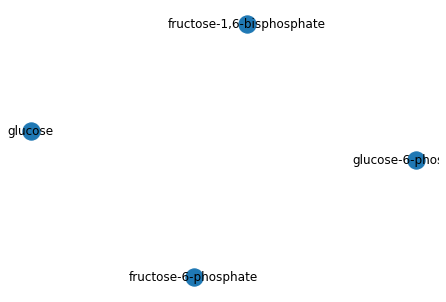

In [63]:
# have to add the enzymes as attributes and not weights 
# THE WEIGHTS CAN BE THE FLUXES SO WE WILL KNOW THE RELATIONSHIP BETWEEN THE NODES!!!
# add directed edges in shell composition 
# use for loops for the edges 

G = nx.DiGraph()

#print(df.reactant)
node_list = [df.reactant]
#print("the node list is: ", node_list)
weight_list = [df.flux]
#print("the weight list is: ", weight_list)

print(G.add_nodes_from(node_list[0], weight = weight_list[0]))   ### gives None ###

# ### maybe a for loop to add the reactants in a list




# do for loop for the edge_list


# G.add_nodes_from(node_list)
# # G.add_weighted_edges_from(edge_list)




# # G.add_edge("glucose", "glucose-6-phosphate", weight = weight_list[0])
###### a = 0
###### for reactants in range (5):
######     reactant = node_list[a]
######     G.add_edge(node_list[a], node_list[a+1], weight = weight_list[a])
######     a += 1
    
# # G.add_node("glucose")
# G.add_node("glucose-6-phosphate")

# # edges 
# G.add_edge("glucose", "glucose-6-phosphate", weight = "0.4", enzyme = "hexokinase")
# labels = nx.get_edge_attributes(G, "enzyme")
# labels2 = nx.get_edge_attributes(G, "weight")

###### new_labels = {}
###### for key in labels.keys():
######     new_labels[key] = "{}({})".format(labels[key], labels2[key])
    
###### new_labels

# #nx.draw_networkx_edge_labels(G, pos = nx.spring_layout(G), edge_labels = new_labels)
    


enzyme_list = df["enzyme"]
flux_list = df["flux"]
attribute_1 = "enzyme_list"
attribute_2 = "flux_list"

position = nx.spring_layout(G)
nx.draw(G, position, with_labels = True)
lables = nx.get_edge_attributes(G, "attribute_1")
lables2 = nx.get_edge_attributes(G, "attribute_2")


###### new_labels = {}
###### for key in labels.keys():
######     new_labels[key] = "{}({})".format(labels[key], labels2[key])
    
###### new_labels

nx.draw_networkx_edge_labels(G, position, edge_labels = new_labels)


## edge labels are dictionaries 
## alpha is the text transparency 
## 




{(1, 3): Text(5.551115123125783e-17, 0.0, 'best friends')}

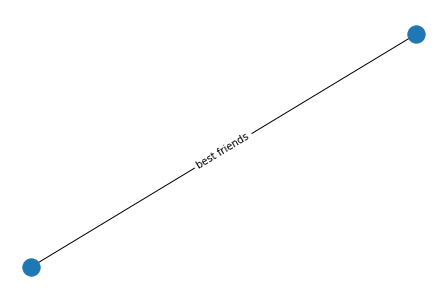

In [22]:
G2 = nx.Graph()
G2.add_edge(1,3, relationship = "best friends")
position = nx.spring_layout(G2)
nx.draw(G2, position, with_lables = True)
labels = nx.get_edge_attributes(G2, "relationship")

nx.draw_networkx_edge_labels(G2, position, edge_labels = labels, node_labels = node_list)

In [5]:
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected = False)
import networkx as nx

G=nx.random_geometric_graph(200,0.125)
pos=nx.get_node_attributes(G,'pos')

dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)

In [6]:
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[edge[0]]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

In [7]:
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = '# of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])

In [8]:
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text="Python code: <a href='https://plot.ly/ipython-notebooks/network-graphs/'> https://plot.ly/ipython-notebooks/network-graphs/</a>",
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')